In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pmdarima as pm
import matplotlib.pyplot as plt

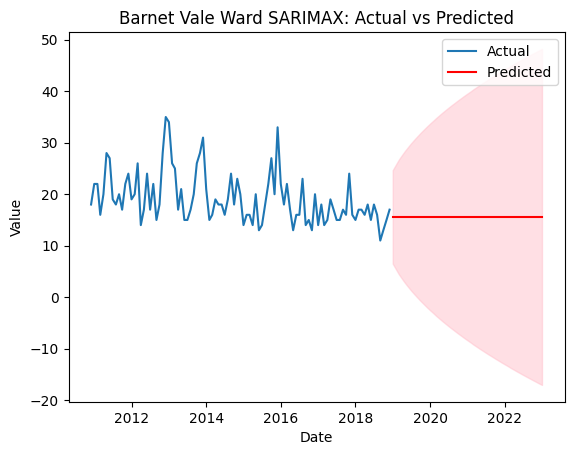

In [ ]:
# Import data
df = pd.read_csv('DC2Data/wards_crime_covid_adjusted_filled_rnd_gaps.csv', index_col=0)
df.index = pd.DatetimeIndex(df.index)
# Filter data for dates before 2019
df = df[df.index.year < 2019]

# Sort data per lsoa and date
# df = df.sort_values(['LSOA code', 'Month'])

for group, data in df.groupby('Ward'):
    data = data.drop(['Ward'], axis=1)
    data.index.freq = 'MS'


    # Perform automatic order selection using auto_arima
    model = pm.auto_arima(data, seasonal=True, m=12, suppress_warnings=True, stepwise=False)

    # Get the optimal order values
    p, d, q = model.order
    P, D, Q, m = model.seasonal_order

    # Fit the SARIMAX model with the optimal order values
    sarimax_model = sm.tsa.statespace.SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, m))
    results = sarimax_model.fit()

    # Print the model summary
    # print(results.summary())

    # Specify the prediction period
    start_date = pd.to_datetime('2019-01-01')
    end_date = pd.to_datetime('2023-01-01')

    # Get the prediction
    prediction = results.get_prediction(start=start_date, end=end_date, dynamic=False)

    # Get the predicted mean and confidence intervals
    predicted_mean = prediction.predicted_mean
    confidence_interval = prediction.conf_int()

    # Plot the actual data and the predicted values
    plt.plot(data.index, data['y'], label='Actual')
    plt.plot(predicted_mean.index, predicted_mean, color='red', label='Predicted')
    plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='pink', alpha=0.5)

    # Set labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{group} SARIMAX: Actual vs Predicted')

    # Add legend
    plt.legend()

    # Display the plot
    plt.show()
# print(p, d, q, P, D, Q, m)

<Axes: xlabel='ds'>

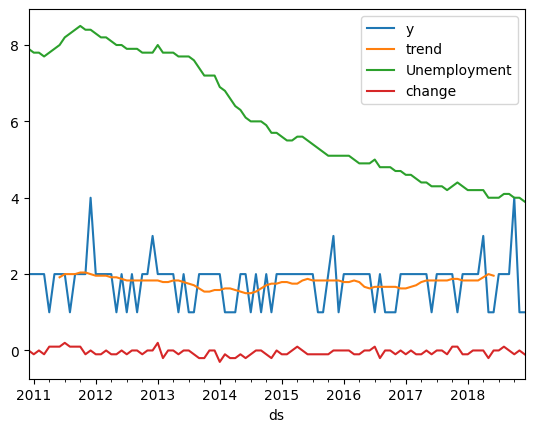

In [31]:
unemp = pd.read_csv('DC2Data/unemployment.csv')

pattern = r'^\d{4}\s[A-Z]{3}$'

# # Filter the DataFrame using the regular expression pattern
unemp = unemp[unemp['Title'].str.contains(pattern)]
unemp['Title'] = pd.to_datetime(unemp['Title'], format='%Y %b')
unemp.columns = ['Date', 'Unemployment']
unemp = unemp.set_index('Date')
unemp["Unemployment"] = unemp["Unemployment"].astype(float)
unemp['change'] = unemp['Unemployment'].diff()
unemp = unemp.dropna()
data["trend"] = decomposition.trend

merged = pd.merge(data, unemp, left_index=True, right_index=True, how='left')
merged.plot()

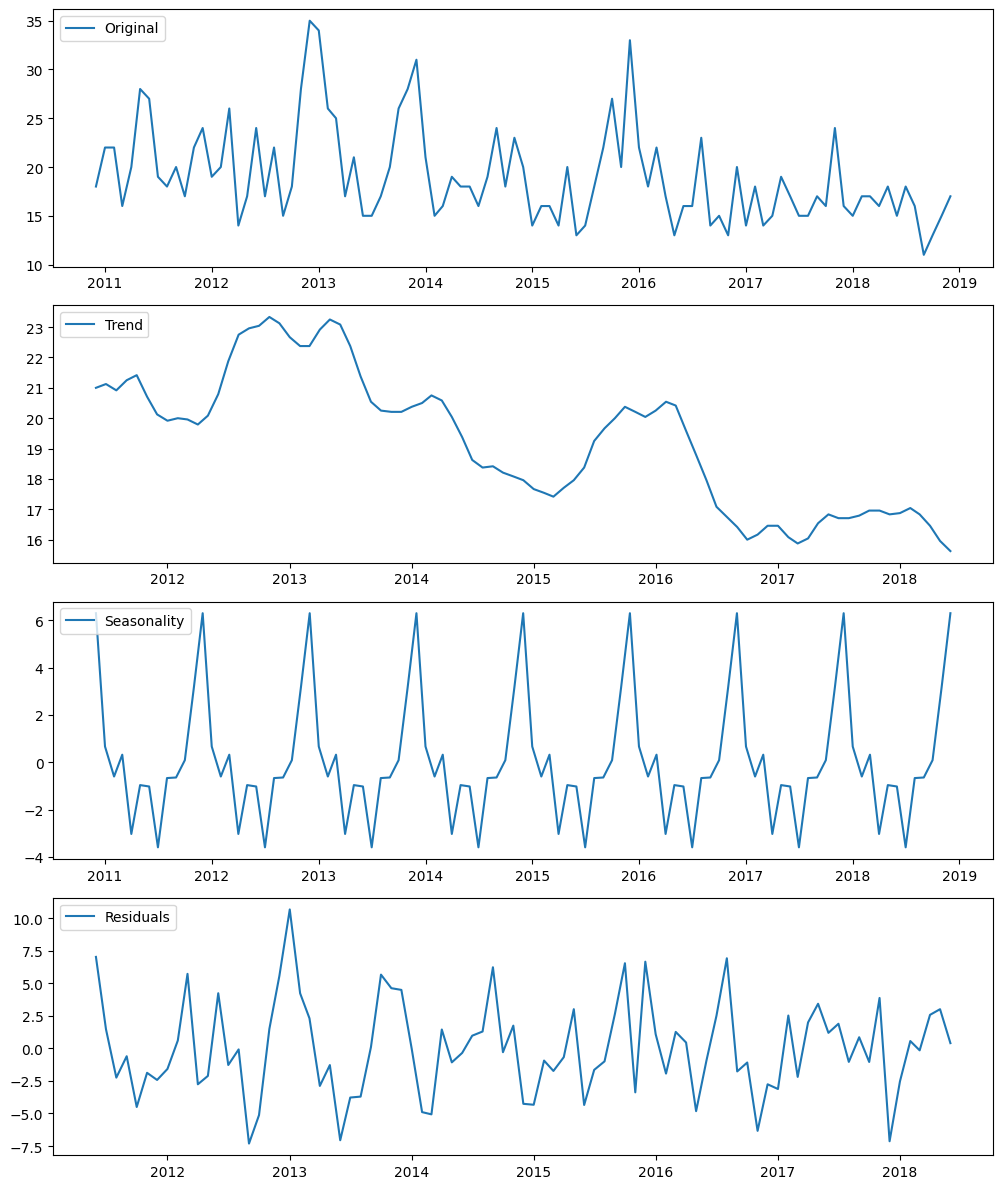

C:\Users\20210777\PycharmProjects\DataChallenge2\venvTemp\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


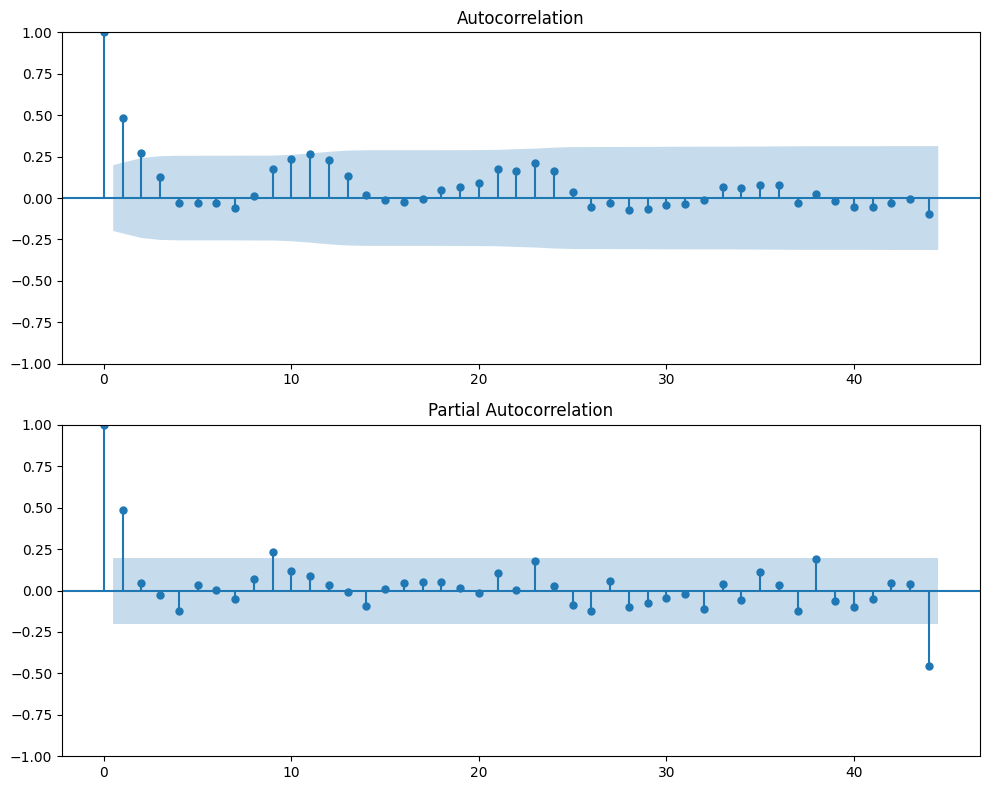

In [5]:
for group, data in df.groupby("Ward"):
    data = data.drop(['Ward'], axis=1)
    # Perform seasonal decomposition using STL
    decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=12)

    # Plot the decomposed components
    fig, ax = plt.subplots(4, 1, figsize=(10, 12))
    ax[0].plot(data, label='Original')
    ax[0].legend(loc='upper left')
    ax[1].plot(decomposition.trend, label='Trend')
    ax[1].legend(loc='upper left')
    ax[2].plot(decomposition.seasonal, label='Seasonality')
    ax[2].legend(loc='upper left')
    ax[3].plot(decomposition.resid, label='Residuals')
    ax[3].legend(loc='upper left')
    plt.tight_layout()
    plt.show()

    # Plot ACF and PACF
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    sm.graphics.tsa.plot_acf(data, lags=44, ax=ax[0])
    sm.graphics.tsa.plot_pacf(data, lags=44, ax=ax[1])
    plt.tight_layout()
    plt.show()
    break